<a href="https://colab.research.google.com/github/purvabadhe/Machine-Learning/blob/main/Codes/Classification_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
df = pd.read_csv('Default.csv')

In [ ]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [ ]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
df["default"].value_counts()/len(df["default"])

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [ ]:
# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

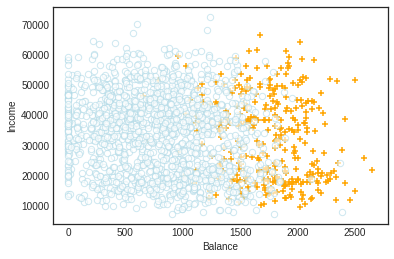

In [ ]:
plt.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1, )
plt.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)
plt.ylabel("Income")
plt.xlabel("Balance");

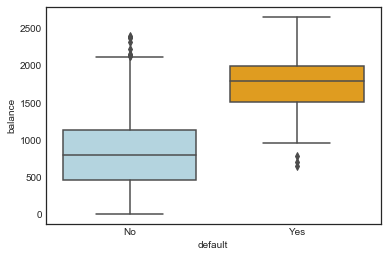

In [ ]:
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', palette=c_palette);

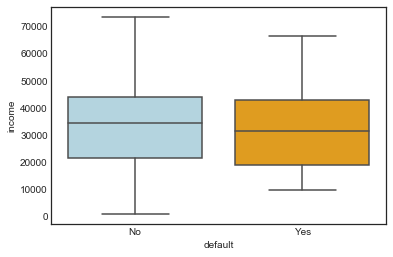

In [ ]:
sns.boxplot('default', 'income', data=df, orient='v', palette=c_palette);

In [ ]:
X_train = df.balance.values.reshape(-1,1)
y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

In [ ]:
prob

array([[9.99976331e-01, 2.36689794e-05],
       [9.99976201e-01, 2.37994885e-05],
       [9.99976069e-01, 2.39307171e-05],
       ...,
       [1.92314085e-02, 9.80768591e-01],
       [1.91279642e-02, 9.80872036e-01],
       [1.90250655e-02, 9.80974934e-01]])

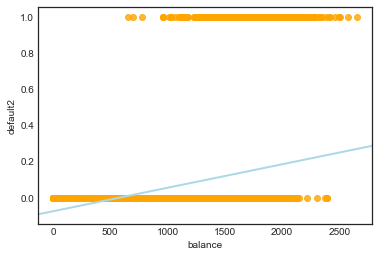

In [ ]:
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2});

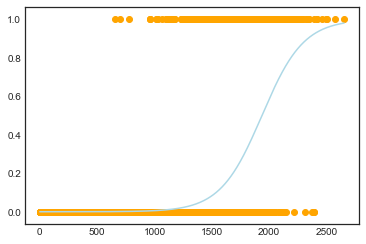

In [ ]:
plt.scatter(X_train, y, color='orange')
plt.plot(X_test, prob[:,1], color='lightblue');

In [ ]:
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549891]]
intercept : [-10.65132158]


In [ ]:
X_train = sm.add_constant(df.balance)

In [ ]:
X_train

,const,balance
0,1.0,729.526495
1,1.0,817.180407
2,1.0,1073.549164
3,1.0,529.250605
4,1.0,785.655883
...,...,...
9995,1.0,711.555020
9996,1.0,757.962918
9997,1.0,845.411989
9998,1.0,1569.009053


In [ ]:
y.ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
est = sm.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [ ]:
X_train = sm.add_constant(df.student2)
y = df.default2

est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


In [ ]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721
